# Section 1) Data extraction.

Here we extract light curves from our three energy bands, interpolate and rebin them, and derive their cross correlation functions.

No modelling is performed in this section.

In [58]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize
import csv
pi = np.pi

Set up binning scales in wavelength, energy and time.

In [59]:
dt_sim = 0.05
dt_dat= 0.05
dt_rebn = 0.5

taus = np.arange(-20, 20, dt_rebn)

wav_range = np.array((5468, 4392, 3465, 2600, 2246, 1928, 25.3, 4.4))
dwav_range = np.array((5800-5050, 4900-3900,3900-3050,2950-2250,2500-2000,2250-1650, 41.3-15.5, 15.5-1.2))

E_range = 12.398/wav_range
dE_range = np.array((12.398/5050 - 12.398/5800,\
            12.398/3900 - 12.398/4900,\
            12.398/3050 - 12.398/3900,
            12.398/2250 - 12.398/2950,
            12.398/2000 - 12.398/2500,
            12.398/1650 - 12.398/2250,
            12.398/15.5 - 12.398/41.3,
            12.398/1.20 - 12.398/15.5))

dE_range = dE_range/2.
dwav_range = dwav_range/2.

E_UVW1 = E_range[3]
dE_UVW1 = dE_range[3]

Extract the raw light curves, and set up time bins in each.

In [60]:
objectname = np.array(())

cadence = np.array(())

MJD_U = np.array(())
MJD_B = np.array(())
MJD_HX = np.array(())
MJD_SX = np.array(())
MJD_UVW2 = np.array(())
MJD_V = np.array(())
MJD_UVM2 = np.array(())
MJD_UVW1 = np.array(())

duration_U = np.array(())
duration_B = np.array(())
duration_HX = np.array(())
duration_SX = np.array(())
duration_UVW2 = np.array(())
duration_V = np.array(())
duration_UVM2 = np.array(())
duration_UVW1 = np.array(())

flux_U = np.array(())
flux_B = np.array(())
flux_HX = np.array(())
flux_SX = np.array(())
flux_UVW2 = np.array(())
flux_V = np.array(())
flux_UVM2 = np.array(())
flux_UVW1 = np.array(())

flux_err_U = np.array(())
flux_err_B = np.array(())
flux_err_HX = np.array(())
flux_err_SX = np.array(())
flux_err_UVW2 = np.array(())
flux_err_V = np.array(())
flux_err_UVM2 = np.array(())
flux_err_UVW1 = np.array(())

with open('raw_lightcurves/NGC4151/lcdata.csv', 'rb') as csvfile:
     data_file = csv.reader(csvfile, delimiter=',', quotechar='|')
     for row in data_file:
         if row[0] == '"NGC4151"':
             if row[1] == '"U"':
                 MJD_U = np.append(MJD_U, row[3])
                 duration_U = np.append(duration_U, row[4])
                 flux_U = np.append(flux_U, row[5])
                 flux_err_U = np.append(flux_err_U, row[6])
             elif row[1] == '"B"':
                 MJD_B = np.append(MJD_B, row[3])
                 duration_B = np.append(duration_B, row[4])
                 flux_B = np.append(flux_B, row[5])
                 flux_err_B = np.append(flux_err_B, row[6])
             elif row[1] == '"HX"':
                 MJD_HX = np.append(MJD_HX, row[3])
                 duration_HX = np.append(duration_HX, row[4])
                 flux_HX = np.append(flux_HX, row[5])
                 flux_err_HX = np.append(flux_err_HX, row[6])
             elif row[1] == '"SX"':
                 MJD_SX = np.append(MJD_SX, row[3])
                 duration_SX = np.append(duration_SX, row[4])
                 flux_SX = np.append(flux_SX, row[5])
                 flux_err_SX = np.append(flux_err_SX, row[6])
             elif row[1] == '"UVW2"':
                 MJD_UVW2 = np.append(MJD_UVW2, row[3])
                 duration_UVW2 = np.append(duration_UVW2, row[4])
                 flux_UVW2 = np.append(flux_UVW2, row[5])
                 flux_err_UVW2 = np.append(flux_err_UVW2, row[6])
             elif row[1] == '"V"':
                 MJD_V = np.append(MJD_V, row[3])
                 duration_V = np.append(duration_V, row[4])
                 flux_V = np.append(flux_V, row[5])
                 flux_err_V = np.append(flux_err_V, row[6])
             elif row[1] == '"UVM2"':
                 MJD_UVM2 = np.append(MJD_UVM2, row[3])
                 duration_UVM2 = np.append(duration_UVM2, row[4])
                 flux_UVM2 = np.append(flux_UVM2, row[5])
                 flux_err_UVM2 = np.append(flux_err_UVM2, row[6])
             elif row[1] == '"UVW1"':
                 MJD_UVW1 = np.append(MJD_UVW1, row[3])
                 duration_UVW1 = np.append(duration_UVW1, row[4])
                 flux_UVW1 = np.append(flux_UVW1, row[5])
                 flux_err_UVW1 = np.append(flux_err_UVW1, row[6])
                
bat_dat = np.genfromtxt('raw_lightcurves/NGC4151/bat.qdp', skip_header=1)
MJD_BAT = bat_dat[:,0]
flux_BAT = bat_dat[:,1]
flux_err_BAT = bat_dat[:,2]

MJD_U = MJD_U.astype('float')
duration_U = duration_U.astype('float')
flux_U = flux_U.astype('float')
flux_err_U = flux_err_U.astype('float')
dt_U = MJD_U[1:] - MJD_U[:-1]

MJD_B = MJD_B.astype('float')
duration_B = duration_B.astype('float')
flux_B = flux_B.astype('float')
flux_err_B = flux_err_B.astype('float')
dt_B = MJD_B[1:] - MJD_B[:-1]

MJD_HX = MJD_HX.astype('float')
duration_HX = duration_HX.astype('float')
flux_HX = flux_HX.astype('float')
flux_err_HX = flux_err_HX.astype('float')
dt_HX = MJD_HX[1:] - MJD_HX[:-1]

MJD_SX = MJD_SX.astype('float')
duration_SX = duration_SX.astype('float')
flux_SX = flux_SX.astype('float')
flux_err_SX = flux_err_SX.astype('float')
dt_SX = MJD_SX[1:] - MJD_SX[:-1]

MJD_UVW2 = MJD_UVW2.astype('float')
duration_UVW2 = duration_UVW2.astype('float')
flux_UVW2 = flux_UVW2.astype('float')
flux_err_UVW2 = flux_err_UVW2.astype('float')
dt_UVW2 = MJD_UVW2[1:] - MJD_UVW2[:-1]

MJD_V = MJD_V.astype('float')
duration_V = duration_V.astype('float')
flux_V = flux_V.astype('float')
flux_err_V = flux_err_V.astype('float')
dt_V = MJD_V[1:] - MJD_V[:-1]

MJD_UVM2 = MJD_UVM2.astype('float')
duration_UVM2 = duration_UVM2.astype('float')
flux_UVM2 = flux_UVM2.astype('float')
flux_err_UVM2 = flux_err_UVM2.astype('float')
dt_UVM2 = MJD_UVM2[1:] - MJD_UVM2[:-1]

MJD_UVW1 = MJD_UVW1.astype('float')
duration_UVW1 = duration_UVW1.astype('float')
flux_UVW1 = flux_UVW1.astype('float')
flux_err_UVW1 = flux_err_UVW1.astype('float')
dt_UVW1 = MJD_UVW1[1:] - MJD_UVW1[:-1]

Now we interpolate the lightcurves as they were irregularly binned.

In [61]:
comparison_times = np.arange(MJD_SX[0], MJD_SX[-1], dt_dat)
flux_BAT_int = np.interp(comparison_times, MJD_BAT, flux_BAT)
flux_U_int = np.interp(comparison_times, MJD_U, flux_U)
flux_V_int = np.interp(comparison_times, MJD_V, flux_V)
flux_B_int = np.interp(comparison_times, MJD_B, flux_B)
flux_HX_int = np.interp(comparison_times, MJD_HX, flux_HX)
flux_UVW1_int = np.interp(comparison_times, MJD_UVW1, flux_UVW1)
flux_UVW2_int = np.interp(comparison_times, MJD_UVW2, flux_UVW2)
flux_UVM2_int = np.interp(comparison_times, MJD_UVM2, flux_UVM2)
flux_SX_int = np.interp(comparison_times, MJD_SX, flux_SX)

flux_err_BAT_int = np.interp(comparison_times, MJD_BAT, flux_err_BAT)
flux_err_U_int = np.interp(comparison_times, MJD_U, flux_err_U)
flux_err_V_int = np.interp(comparison_times, MJD_V, flux_err_V)
flux_err_B_int = np.interp(comparison_times, MJD_B, flux_err_B)
flux_err_HX_int = np.interp(comparison_times, MJD_HX, flux_err_HX)
flux_err_UVW1_int = np.interp(comparison_times, MJD_UVW1, flux_err_UVW1)
flux_err_UVW2_int = np.interp(comparison_times, MJD_UVW2, flux_err_UVW2)
flux_err_UVM2_int = np.interp(comparison_times, MJD_UVM2, flux_err_UVM2)
flux_err_SX_int = np.interp(comparison_times, MJD_SX, flux_err_SX)

Now we can rebin the lightcurves to obtain a more reliable signal/noise. These are the lightcurves we will model later on.

In [62]:
bins = np.arange(MJD_SX[0], MJD_SX[-1], dt_rebn)
digitized = np.digitize(comparison_times[3:-3], bins)
comparison_times_rebn = np.asarray([comparison_times[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_BAT_rebn = np.asarray([flux_BAT_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_U_rebn = np.asarray([flux_U_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_V_rebn = np.asarray([flux_V_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_B_rebn = np.asarray([flux_B_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_HX_rebn = np.asarray([flux_HX_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_SX_rebn = np.asarray([flux_SX_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_UVW1_rebn = np.asarray([flux_UVW1_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_UVW2_rebn = np.asarray([flux_UVW2_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_UVM2_rebn = np.asarray([flux_UVM2_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])

flux_err_BAT_rebn = np.asarray([flux_err_BAT_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_U_rebn = np.asarray([flux_err_U_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_B_rebn = np.asarray([flux_err_B_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_V_rebn = np.asarray([flux_err_V_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_HX_rebn = np.asarray([flux_err_HX_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_SX_rebn = np.asarray([flux_err_SX_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_UVW1_rebn = np.asarray([flux_err_UVW1_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_UVW2_rebn = np.asarray([flux_err_UVW2_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_UVM2_rebn = np.asarray([flux_err_UVM2_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])

Now we can plot the rebinned light curves and have a look at them.

Text(0,0.5,'BAT')

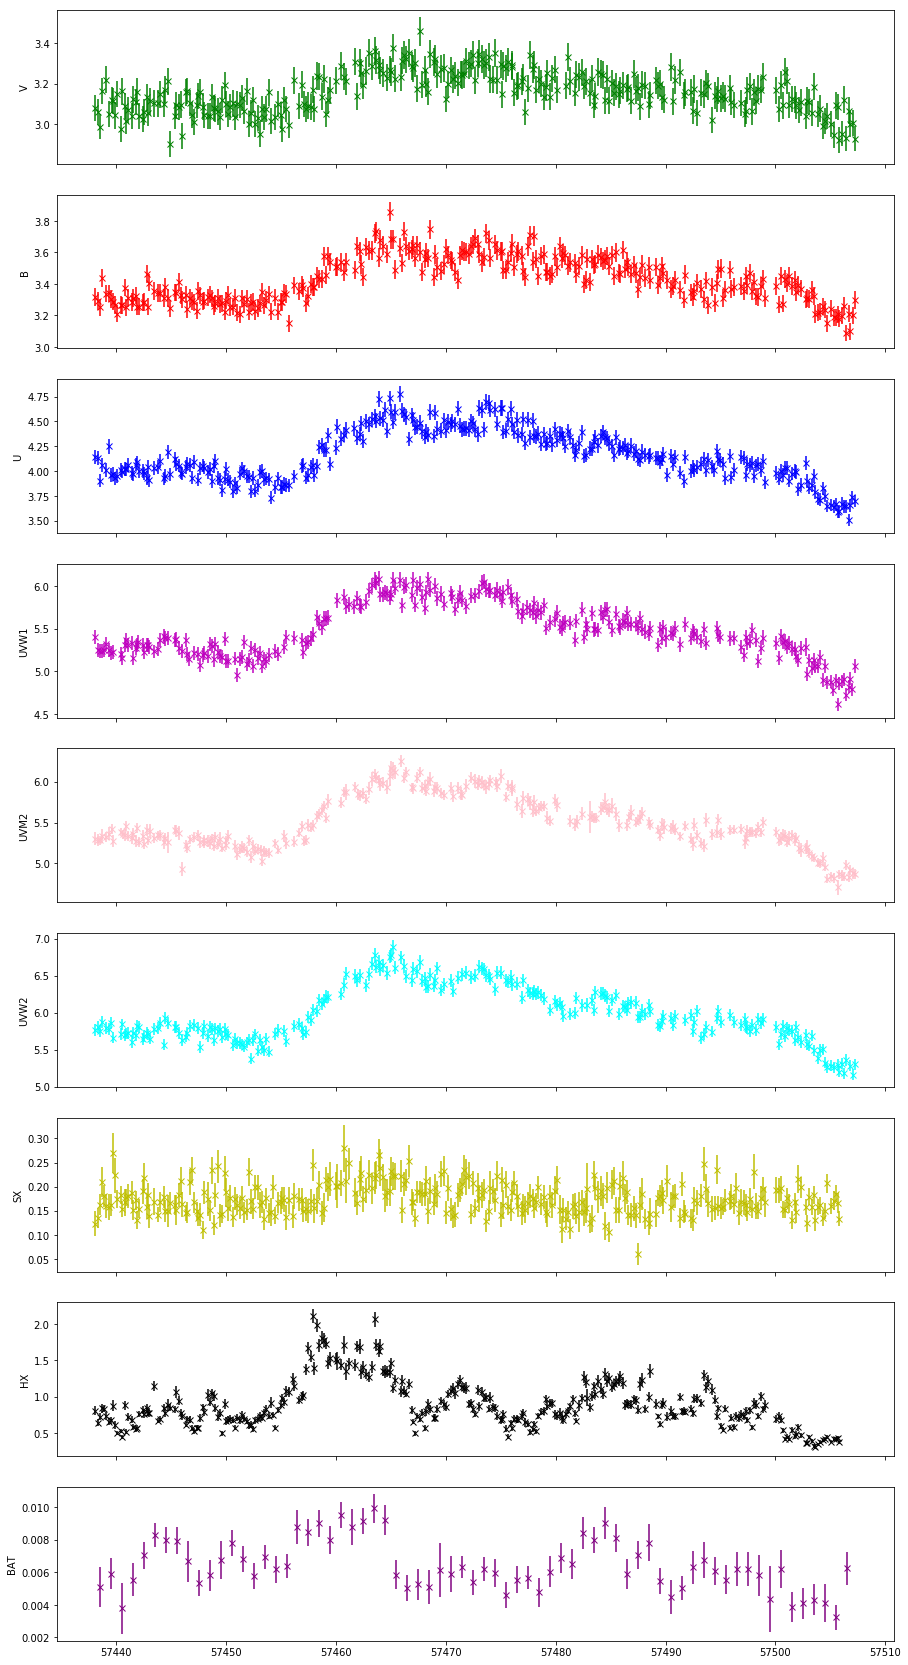

In [63]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9) = plt.subplots(9, sharex = True, figsize = (15, 30))
ax1.errorbar(MJD_V, flux_V, flux_err_V, xerr = duration_V/86400., label = 'V', c='g', ls = 'none', fmt = 'x')
ax1.set_ylabel('V')
ax2.errorbar(MJD_B, flux_B, flux_err_B, xerr = duration_B/86400., label = 'B', c='r', ls = 'none', fmt = 'x')
ax2.set_ylabel('B')
ax3.errorbar(MJD_U, flux_U, flux_err_U, xerr = duration_U/86400., label = 'U', c='b', ls = 'none', fmt = 'x')
ax3.set_ylabel('U')
ax4.errorbar(MJD_UVW1, flux_UVW1, flux_err_UVW1, xerr = duration_UVW1/86400., label = 'UVW1', c='m', ls = 'none', fmt = 'x')
ax4.set_ylabel('UVW1')
ax5.errorbar(MJD_UVM2, flux_UVM2, flux_err_UVM2, xerr = duration_UVM2/86400., label = 'UVM2', c='pink', ls = 'none', fmt = 'x')
ax5.set_ylabel('UVM2')
ax6.errorbar(MJD_UVW2, flux_UVW2, flux_err_UVW2, xerr = duration_UVW2/86400., label = 'UVW2', c='cyan', ls = 'none', fmt = 'x')
ax6.set_ylabel('UVW2')
ax7.errorbar(MJD_SX, flux_SX, flux_err_SX, xerr = duration_SX/86400., label = 'SX', c='y', ls = 'none', fmt = 'x')
ax7.set_ylabel('SX')
ax8.errorbar(MJD_HX, flux_HX, flux_err_HX, xerr = duration_HX/86400., label = 'HX', c='k', ls = 'none', fmt = 'x')
ax8.set_ylabel('HX')
ax9.errorbar(MJD_BAT, flux_BAT, flux_err_BAT, label = 'BAT', c='purple', ls = 'none', fmt = 'x')
ax9.set_ylabel('BAT')

Now we will produce cross-correlation functions (CCFs) between our UVM2 band and the other two. To do this we will define the CCF.

In [64]:
def CCF(s, h, dt, s_err = 0, h_err=0, s_int_err = 0, h_int_err = 0):  
    
    if type(s_err)==int :
        s_err = np.zeros(len(s))
    if type(h_err)==int:
        h_err = np.zeros(len(h))
    
    lens = len(s)

    corrs = np.zeros(len(taus))
    
    for j in range(len(taus)):
        tau = taus[j]
        di = int(tau/dt)
        if abs(di) < lens:
            if di > 0:
                '''Imagine s staying fixed and h 'rolling' forward by di beneath it.'''
                s_up = s[:-di]
                s_err_up = s_err[:-di]
                h_up = h[di:]
                h_err_up = h_err[di:]
            elif di == 0:
                s_up = s
                s_err_up = s_err
                h_up = h
                h_err_up = h_err
            else:
                s_up = s[abs(di):]
                s_err_up = s_err[abs(di):]
                h_up = h[:-abs(di)]
                h_err_up = h_err[:-abs(di)]     
            save = np.average(s_up)
            have = np.average(h_up)
            sig_s = np.var(s_up)
            sig_h = np.var(h_up)
            sig_s_err = np.var(s_err_up)
            sig_h_err = np.var(h_err_up)
            lens_up = len(s_up)
            
            corrs[j] = np.sum((s_up - save) * (h_up - have)) / lens_up
            corrs[j] = corrs[j] / ((sig_s * (1 - s_int_err) - sig_s_err) * (sig_h * (1-h_int_err) - sig_h_err))**0.5
        
    return corrs

We should also correct for interpolation error as in Gardner & Done 2017. This requires that we define a gaussian function and fit our raw CCF using two gaussian functions; the narrow central gaussian will be spurious, and so we can quantify the interpolation error in terms of the narrow gaussian parameters.

In [65]:
def gaussian(x, amp_A, sig2_A, amp_B, sig2_B, K):
    return amp_A / np.sqrt(2*pi*sig2_A) * np.exp( - (x)**2 / (2*sig2_A)) + amp_B / np.sqrt(2*pi*sig2_B) * np.exp( - (x)**2 / (2*sig2_B)) + K

def CCF_corrected(s, h, dt, s_err, h_err, mode = 'corr'):
    if mode == 'corr':
        ACF_s = CCF(s, s, dt_rebn, s_err, s_err)
        params_s = scipy.optimize.curve_fit(gaussian,taus,ACF_s, maxfev = 50000)[0]
        
        ACF_h = CCF(h, h, dt_rebn, h_err, h_err)
        params_h = scipy.optimize.curve_fit(gaussian,taus,ACF_h, maxfev = 50000)[0]
        
        sig2_e_s_rat = min(params_s[1], params_s[3]) / max(params_s[1], params_s[3])
        sig2_e_h_rat = min(params_h[1], params_h[3]) / max(params_h[1], params_h[3])
    
        CCF_corr = CCF(s, h, dt, s_err, h_err, sig2_e_s_rat, sig2_e_h_rat)
    if mode == 'nocorr':
        CCF_corr = CCF(s, h, dt, s_err, h_err)        

    return CCF_corr[::-1]


Now we can plot the corrected CCFs of our data and compare them.

/home/raad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/raad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Text(0,0.5,'normalised CCF')

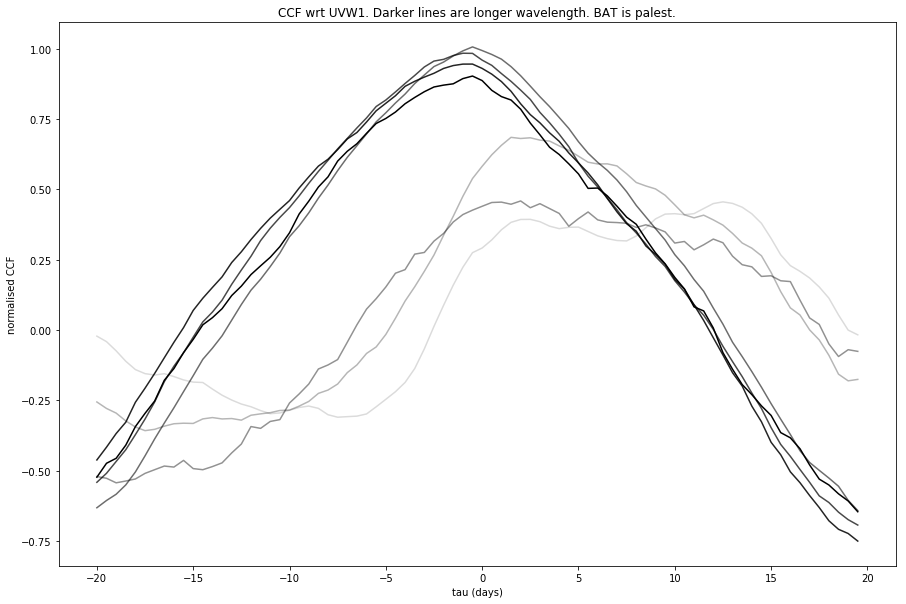

In [66]:
CCF_SX = CCF_corrected(flux_UVW1_rebn, flux_SX_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_SX_rebn)
CCF_HX = CCF_corrected(flux_UVW1_rebn, flux_HX_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_HX_rebn)
CCF_UVW2 = CCF_corrected(flux_UVW1_rebn, flux_UVW2_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_UVW2_rebn)
CCF_UVM2 = CCF_corrected(flux_UVW1_rebn, flux_UVM2_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_UVM2_rebn)
CCF_V = CCF_corrected(flux_UVW1_rebn, flux_V_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_V_rebn)
CCF_B = CCF_corrected(flux_UVW1_rebn, flux_B_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_B_rebn)
CCF_U = CCF_corrected(flux_UVW1_rebn, flux_U_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_U_rebn)
CCF_BAT = CCF_corrected(flux_UVW1_rebn, flux_BAT_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_BAT_rebn)

f, ax = plt.subplots(figsize=  (15,10))
ax.plot(taus, CCF_BAT, c = 'k', alpha = 1/7.)
ax.plot(taus, CCF_HX, c = 'k', alpha = 2/7.)
ax.plot(taus, CCF_SX, c = 'k', alpha = 3/7.)
ax.plot(taus, CCF_UVM2, c = 'k', alpha = 4/7.)
ax.plot(taus, CCF_U, c = 'k', alpha = 5/7.)
ax.plot(taus, CCF_B, c = 'k', alpha = 6/7.)
ax.plot(taus, CCF_V, c = 'k' , alpha = 7/7.)
ax.set_title('CCF wrt UVW1. Darker lines are longer wavelength. BAT is palest.')
ax.set_xlabel('tau (days)')
ax.set_ylabel('normalised CCF')

In [67]:
import os
import scipy
import xspec

Users should ensure that they either have a version of XSPEC sufficiently new that it contains the model agnsed
or that they have agnsed installed as a local model. In the latter case, uncomment and fill in the following piece of code.

In [68]:
'''
xspec.AllModels.initpackage("agnmodel", "lmodel_agnsed.dat", "path/to/your/agnsed_local_model")
xspec.AllModels.lmod("agnmodel", "path/to/your/agnsed_local_model")
'''

'\nxspec.AllModels.initpackage("agnmodel", "lmodel_agnsed.dat", "path/to/your/agnsed_local_model")\nxspec.AllModels.lmod("agnmodel", "path/to/your/agnsed_local_model")\n'

In [69]:
'''For Raad's use only; please ignore if I've left this in.'''

xspec.AllModels.initpackage("agnmodel", "lmodel_agnsed.dat", "/home/raad/PhD/Data/Work_Dir/agnsed")
xspec.AllModels.lmod("agnmodel", "/home/raad/PhD/Data/Work_Dir/agnsed")
os.chdir("/home/raad/PhD/Dropbox/Code/AGN_togithub")


Here we have some physical constants in cgs units.

In [70]:
c = 29979245800.
M_sol =  1.989e33
G = 6.6743e-8
m_p = 1.6726219 * 10**-24
sig_T = 6.6524 * 10**-25
k_B = 1.38064852 * 10**-16
keV = 1.60218e-12 * 10**3.
sig_SB = 5.6704 * 10**-5

Here we have the parameters of the physical system derived from prior xspec fitting.

In [71]:
M_bh_M_sol = 4. * 10**7
D = 19
logmdot = -1.86505
astar = 0.
cosi = 0.6
redshift = 0.0033

logrout=5.
r_o=10**logrout
r_DS = 390.
r_SH = 90.1314
r_i = 6.
f_irr = 1.
hx = 10.
kT_hot = 100.
kT_warm = 0.17
Gamma_hot = 1.793
Gamma_warm = 2.7

incl = np.arccos(cosi)

M_bh = M_bh_M_sol * M_sol
R_g = G*M_bh /c**2

Now we can boot up xspec within python, and set up our agnsed model and environment.

In [72]:

os.chdir("xspec_placeholder_data")

s = xspec.Spectrum("source_c20.pi")
m = xspec.Model("agnsed")
xspec.AllData.dummyrsp(1e-5,1e3,10000)


xspec.Xset.abund = "grsa"
xspec.Xset.cosmo = "70 0 0.73"
xspec.Xset.xsect = "bcmc"

Now we can individually model the disc and soft and hard Compton components, and save their fluxes over the energy range (edat) in arrays disc_raw_agnsed_energy, soft_raw_agnsed_energy and hard_raw_agnsed_energy.

We will also compute the luminosities of these three components for interest, and to use L_hard later in lightcurve modelling.

In [73]:
#Modelling the disc.

m.setPars(M_bh_M_sol, D, logmdot, astar, cosi, kT_hot, kT_warm,\
          Gamma_hot, "-{},1e-2,-2.7,-2.7,2.7,2.7".format(Gamma_warm), r_SH, r_DS, logrout, hx, 1., redshift,1)
xspec.Plot("emo")
edat = np.asarray(xspec.Plot.x())
F_disc_raw = np.asarray(xspec.Plot.model())
F_disc_raw = np.nan_to_num(F_disc_raw)
disc_raw_agnsed_energy = np.trapz(F_disc_raw, edat)
xspec.AllModels.calcLumin("4e-5 1000. 3.3e-03")
L_disc =s.lumin[0]*1.0e44 # erg s^-1


#Modelling the soft Compton.
m.setPars(M_bh_M_sol, D, logmdot, astar, cosi, kT_hot, "-{},,-5.,-5.,100.,100.".format(kT_warm),\
          Gamma_hot, Gamma_warm, r_SH, r_DS, logrout, hx, 1., redshift,1)
xspec.Plot.device = "null"
xspec.Plot("emo")
F_soft_raw = np.asarray(xspec.Plot.model())
F_soft_raw = np.nan_to_num(F_soft_raw)
soft_raw_agnsed_energy = np.trapz(F_soft_raw, edat)
xspec.AllModels.calcLumin("4e-5 1000. 3.3e-03")
L_soft =s.lumin[0]*1.0e44 # erg s^-1


#Modelling the hard Compton.
m.setPars(M_bh_M_sol, D, logmdot, astar, cosi, "-{},,-100.,-100.,100.,100.".format(kT_hot), kT_warm,\
          Gamma_hot, Gamma_warm, r_SH, r_DS, logrout, hx, 1., redshift,1)
xspec.Plot("emo")
F_hard_raw = np.asarray(xspec.Plot.model())
F_hard_raw = np.nan_to_num(F_hard_raw)
hard_raw_agnsed_energy = np.trapz(F_hard_raw, edat)
xspec.AllModels.calcLumin("4e-5 1000. 3.3e-03")
L_hard = s.lumin[0]*1.0e44 # erg s^-1

Let's plot what we've modelled to check how our spectrum looks (and that it matches with our original xspec fit!).

Text(0,0.5,'$keV^2$ $(Photons$ $cm^{-2}$ $s^{-1}$ $kev^{-1})$')

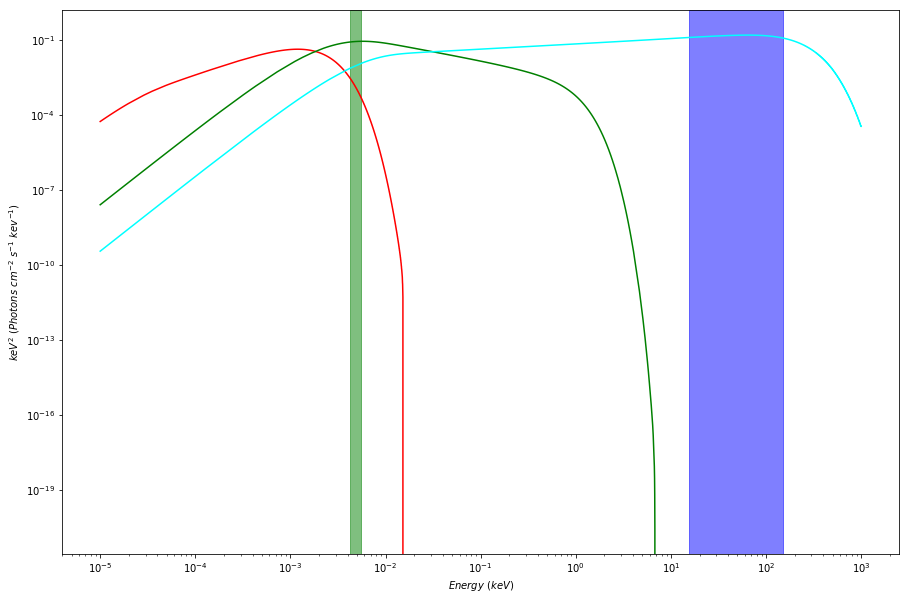

In [74]:
f, ax1 = plt.subplots(figsize=  (15,10))
ax1.plot(edat, edat*F_disc_raw, c = 'red')
ax1.plot(edat, edat*F_soft_raw, c = 'green')
ax1.plot(edat, edat*F_hard_raw, c = 'cyan')
ax1.axvspan(12.398/2950., 12.398/2250, color = 'g', alpha =0.5)
ax1.axvspan(15.5, 150, color = 'b', alpha =0.5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('$Energy$ $(keV)$')
ax1.set_ylabel('$keV^2$ $(Photons$ $cm^{-2}$ $s^{-1}$ $kev^{-1})$')

Now that the overall spectral components are taken care of, we can define some functions describing the radial range we will model on the disc/warm Compton, the temperature due to gravitational dissipation, the heating due to hard X-ray illumination, and the effective temperare on the disc from exernal heating+gravity.

In [75]:
N_r = 10 # We will model 10 annuli in the soft zone and 10 annuli in the thin disc.

def r_bounds(r_o, r_i, N_r):
    return np.logspace( log10(r_o), log10(r_i), N_r + 1 )

def M_dot(logmdot):
    L_Ledd = 10**logmdot
    Ledd = 4*pi*G*M_bh*m_p*c/sig_T
    L = L_Ledd * Ledd
    Mdot=  L / (0.0572 * c**2)
    return Mdot 

def T_grav_F_grav(r, dr):
    Mdot = M_dot(logmdot)
    temp = ((G*M_bh*Mdot/(8*pi*sig_SB)) * (r*R_g)**-3. * 3 )**(1./4.)
    return k_B * temp / keV, sig_SB*temp**4

def F_rep(r, L_cor=L_hard):
    n = pi/2. - np.arctan2(hx, r)
    l = np.sqrt(r**2 + hx**2)
    return f_irr * L_cor * np.cos(n) / (4*pi*(l*R_g)**2)

def T_eff(r, dr, L_cor=L_hard):
    T_g, F_g = T_grav_F_grav(r, dr)
    F_r = F_rep(r, L_cor)    
    T_out = T_g * ((F_r+F_g)/F_g)**0.25
    return T_out

Now we model the energy spectrum from every annulus in the thermal disc.

In [76]:
# We define the radial range and annular thicknesses on our disc.
r_bins_disc = r_bounds(r_o, r_DS, N_r)
rs_disc = np.asarray([(r_bins_disc[i+1]+r_bins_disc[i])/2 for i in range(len(r_bins_disc)-1)])
drs_disc = [(r_bins_disc[i] -r_bins_disc[i+1]) for i in range(len(r_bins_disc)-1)]

# Now we compute the time-averaged gravitational heating temperature, the heating temperature, 
# the gravitational dissipation flux, the X-ray heating flux and the overall temperature for every annulus
# on the disc.
T_gravs_disc = np.zeros(N_r)
F_gravs_disc = np.zeros(N_r)
F_reps0_disc = np.zeros(N_r)
T_effs0_disc = np.zeros(N_r)
repfracs_disc = np.zeros(N_r)

for i in range(N_r):
    T_gravs_disc[i] = T_grav_F_grav(rs_disc[i],drs_disc[i])[0]    
    F_gravs_disc[i] = T_grav_F_grav(rs_disc[i],drs_disc[i])[1]
    F_reps0_disc[i] = F_rep(rs_disc[i])
    repfracs_disc[i] = F_reps0_disc[i] / F_gravs_disc[i]
    T_effs0_disc[i] = T_eff(rs_disc[i],drs_disc[i])

# We now normalize the spectral shape of our annular thermal spectra so that the energy in their sum equals the
# energy in the AGNSED thermal component.

def discnorms():
    m = xspec.Model("bbody")
    m.setPars("0.2,-1,1e-8,1e-8,0.2,0.2", "100.")
    disc_fluxes = np.zeros((N_r, len(edat)))
    total_disc_r = np.zeros(N_r)
    for i in range(N_r):
        r = rs_disc[i]
        dr = drs_disc[i]
        eps = r**-3. * 3 * (1- np.sqrt(r_DS/r)) * r * dr
        T_effr = T_effs0_disc[i]            
        m.setPars({1:T_effr})
        xspec.Plot("emo")
        disc_fluxes[i] = np.nan_to_num(np.asarray(xspec.Plot.model())) * eps
        total_disc_r[i] = np.trapz(disc_fluxes[i], edat)
    disc_raw_comptt_energy= np.sum(total_disc_r)
    norm = disc_raw_agnsed_energy / disc_raw_comptt_energy
    return norm

# discnorm is only computed once, andis what we will use in the following modelling to ensure that the fluxes
# from our annuli are consistent with the AGNSED-fit spectrum.
discnorm = discnorms()

Now we will plot all of our disc annuli to see how they contribute to the UVW1 band.

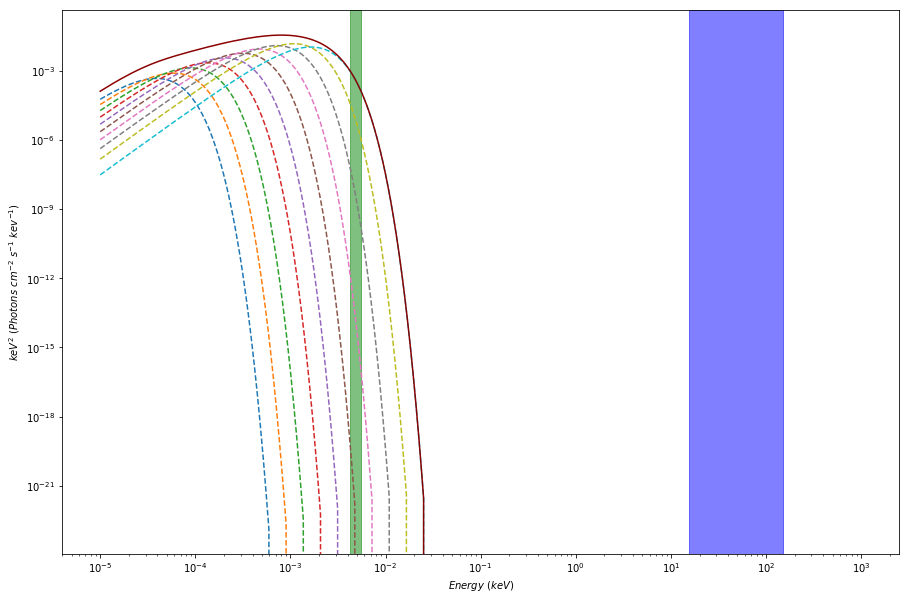

In [77]:
f, ax2 = plt.subplots(figsize=  (15,10))

m = xspec.Model("bbody")
m.setPars("0.2,-1,1e-8,1e-8,0.2,0.2", "100.")
disc_fluxes = np.zeros((N_r, len(edat)))
total_disc_r = np.zeros(N_r)
for i in range(N_r):
    r = rs_disc[i]
    dr = drs_disc[i]
    eps = r**-3. * 3 * (1- np.sqrt(r_DS/r)) * r * dr
    T_effr = T_effs0_disc[i]            
    m.setPars({1:T_effr})
    xspec.Plot("emo")
    disc_fluxes[i] = np.nan_to_num(np.asarray(xspec.Plot.model())) * eps
    ax2.plot(edat, discnorm*edat*disc_fluxes[i], linestyle = '--')

ax2.plot(edat, discnorm*edat*np.sum(disc_fluxes,axis=0), c = 'darkred')
ax2.axvspan(12.398/2950., 12.398/2250, color = 'g', alpha =0.5)
ax2.axvspan(15.5, 150, color = 'b', alpha =0.5)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('$Energy$ $(keV)$')
ax2.set_ylabel('$keV^2$ $(Photons$ $cm^{-2}$ $s^{-1}$ $kev^{-1})$')
plt.show()

We now repeat the above procedure for the warm Compton zone, and plot our resultant annular spectra.

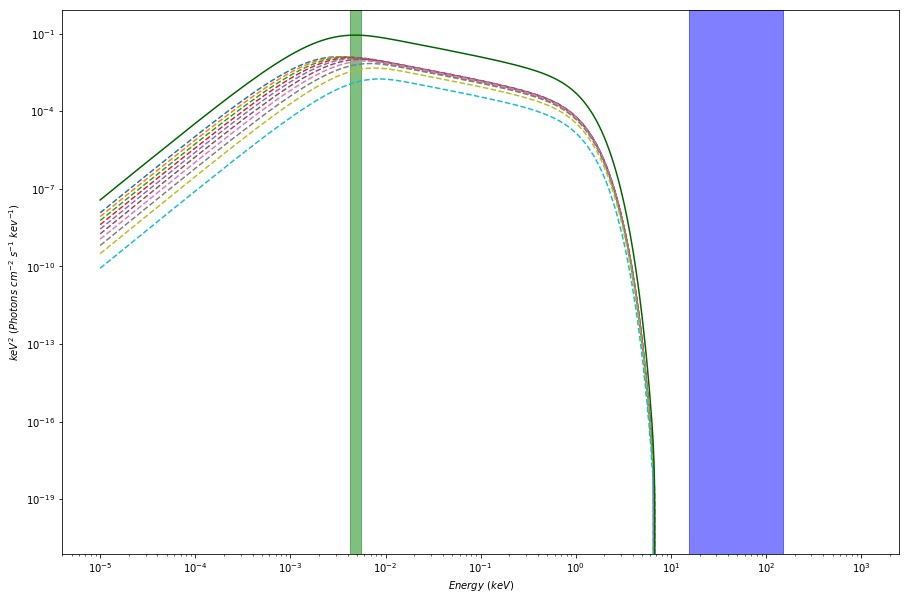

In [78]:
r_bins_warm = r_bounds(r_DS, r_SH, N_r)
rs_warm = np.asarray([(r_bins_warm[i+1]+r_bins_warm[i])/2 for i in range(len(r_bins_warm)-1)])
drs_warm = [(r_bins_warm[i] -r_bins_warm[i+1]) for i in range(len(r_bins_warm)-1)]

T_gravs_warm = np.zeros(N_r)
T_effs0_warm = np.zeros(N_r)
F_gravs_warm = np.zeros(N_r)
F_reps0_warm = np.zeros(N_r)
repfracs_warm = np.zeros(N_r)
for i in range(N_r):
    T_gravs_warm[i] = T_grav_F_grav(rs_warm[i],drs_warm[i])[0]    
    F_gravs_warm[i] = T_grav_F_grav(rs_warm[i],drs_warm[i])[1]
    F_reps0_warm[i] = F_rep(rs_warm[i])
    repfracs_warm[i] = F_reps0_warm[i] / F_gravs_warm[i]
    T_effs0_warm[i] = T_eff(rs_warm[i],drs_warm[i])

def compnorms():
    m = xspec.Model("nthcomp")
    m.setPars(Gamma_warm,"{},,0.,0.,100.,100.,".format(kT_warm),"0.00056,,0.,0.,100.,100.",0.,redshift,"1.")
    soft_fluxes = np.zeros((N_r, len(edat)))
    total_comptt_r = np.zeros(N_r)
    for i in range(N_r):
        r = rs_warm[i]
        dr = drs_warm[i]
        eps = r**-3. * 3 * (1- np.sqrt(r_SH/r)) * r * dr
        T_effr = T_effs0_warm[i]
        m.setPars({3:T_effr})
        xspec.Plot("emo")
        soft_fluxes[i] = np.nan_to_num(np.asarray(xspec.Plot.model())) * eps
        total_comptt_r[i] = np.trapz(soft_fluxes[i], edat)
    soft_raw_comptt_energy= np.sum(total_comptt_r)
    norm = soft_raw_agnsed_energy / soft_raw_comptt_energy

    return norm

compnorm = compnorms()



f, ax3 = plt.subplots(figsize=  (15,10))

m = xspec.Model("nthcomp")
m.setPars(Gamma_warm,"{},,0.,0.,100.,100.,".format(kT_warm),"0.00056,,0.,0.,100.,100.",0.,redshift,"1.")
soft_fluxes = np.zeros((N_r, len(edat)))
total_comptt_r = np.zeros(N_r)
for i in range(N_r):
    r = rs_warm[i]
    dr = drs_warm[i]
    eps = r**-3. * 3 * (1- np.sqrt(r_SH/r)) * r * dr
    T_effr = T_effs0_warm[i]
    m.setPars({3:T_effr})
    xspec.Plot("emo")
    soft_fluxes[i] = np.nan_to_num(np.asarray(xspec.Plot.model())) * eps
    ax3.plot(edat, compnorm*edat*soft_fluxes[i], linestyle = '--')
    total_comptt_r[i] = np.trapz(soft_fluxes[i], edat)
ax3.plot(edat, compnorm*edat*np.sum(soft_fluxes,axis=0), c = 'darkgreen')

ax3.axvspan(12.398/2950., 12.398/2250, color = 'g', alpha =0.5)
ax3.axvspan(15.5, 150, color = 'b', alpha =0.5)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('$Energy$ $(keV)$')
ax3.set_ylabel('$keV^2$ $(Photons$ $cm^{-2}$ $s^{-1}$ $kev^{-1})$')
plt.show()

We will now deal with the timing-exclusive aspects of our model.

First we define the transfer function for an annulus with inner edge r_inner and outer edge r_outer, according to the procedure of Welsh & Horne (1991).

In [79]:
def point_illum_transferfn(r_outer, r_inner):
    N_disc = 500
    N_phi = 500
    dphi = 2*pi / N_phi
    taus = np.arange(0, 500, dt_dat)
    
    r_bins = np.linspace( r_outer, r_inner, N_disc + 1 )
    rs = np.asarray([(r_bins[i+1]+r_bins[i])/2 for i in range(len(r_bins)-1)])
    drs = [(r_bins[i] -r_bins[i+1]) for i in range(len(r_bins)-1)]
    
    tf = np.zeros(len(taus))
    for i in range(N_disc):
        for j in range(N_phi):
            t = rs[i] * R_g / (c*86400) * (1.0 - np.sin(incl)*np.cos(-pi/2. + dphi*j))
            tindex = int(t/dt_dat)+1
            f_r = drs[i]/(r_outer - r_inner)
            f_phi = dphi/(2.*pi)
            tf[tindex] += f_r*f_phi
    return taus, tf

Now we can define the time-delayed hard X-ray time series as seen by each disc and warm Compton annulus.

In [80]:
def lagged_array(N_r, rs, drs):
    lagged_driving = np.zeros((N_r, len(comparison_times_rebn)))
    for i in range(N_r):
        r, dr = rs[i], drs[i]
        len_T = len(comparison_times)
        outcurve = np.zeros(len_T)
        tf = point_illum_transferfn(r+dr/2, r-dr/2)[1]
        for j in range(len_T):
            for k in range(len_T):
                if k-j >= 0:
                    outcurve[k] += tf[j]*flux_BAT_int[k-j]   
        digitized = np.digitize(comparison_times, bins)
        outcurve_rebn = np.asarray([outcurve[digitized == p].mean() for p in range(1, len(bins))])
        lagged_driving[i] = outcurve_rebn
    return lagged_driving

lagged_driving_disc = lagged_array(N_r, rs_disc, drs_disc)
lagged_driving_disc_aves = np.mean(lagged_driving_disc, axis = 1)

lagged_driving_warm = lagged_array(N_r, rs_warm, drs_warm)
lagged_driving_warm_aves = np.mean(lagged_driving_warm, axis = 1)

At last we can now run the model to recover the predicted UVW1 lightcurve.

In [81]:
i_UVW1_min = min(np.argwhere(edat>(E_UVW1-dE_UVW1)))[0]
i_UVW1_max = min(np.argwhere(edat>(E_UVW1+dE_UVW1)))[0]

def UVW1curve():
    soft_fluxes = np.zeros((N_r, len(edat)))
    driving = flux_BAT_rebn / np.average(flux_BAT_rebn)
    xspec.AllData.dummyrsp(1e-5,1e3,10000)
    
    m = xspec.Model("nthcomp")
    m.setPars(Gamma_warm,"{},,0.,0.,100.,100.,".format(kT_warm),"0.00056,,0.,0.,100.,100.",0.,redshift,"1.")
    xspec.Plot.device = "null"

    emissivities = np.zeros(N_r)
    lightcurve = np.zeros(len(comparison_times_rebn))
    for i in range(N_r):
        r = rs_warm[i]
        dr = drs_warm[i]
        emissivities[i] = r**-3. * 3 * (1- np.sqrt(r_SH/r)) * r * dr
        
    for j in range(len(comparison_times_rebn)):
        
        lightcurve[j] += np.trapz(driving[j] * F_hard_raw[i_UVW1_min:i_UVW1_max+1], edat[i_UVW1_min:i_UVW1_max+1])
        
        for i in range(N_r):
            fluctuation = lagged_driving_warm[i,j] / lagged_driving_warm_aves[i]
            L_cor_t = L_hard * fluctuation            
            r, dr = rs_warm[i], drs_warm[i]
            T_r = T_eff(r, dr, L_cor_t)
            m.setPars({3:T_r})
            xspec.Plot("emo")
            soft_fluxes[i] = np.nan_to_num(np.asarray(xspec.Plot.model())) * compnorm * emissivities[i] * (1.+repfracs_warm[i]*(fluctuation-1))
            lightcurve[j] += np.trapz(soft_fluxes[i][i_UVW1_min:i_UVW1_max+1], edat[i_UVW1_min:i_UVW1_max+1])
    
    
    # Uncomment the block below to include reprocessing on the thermal disc which we note has only a negligible
    # impact on the lightcurve due to the lack of thermal photons in the UVW1 band.
    '''
    disc_fluxes = np.zeros((N_r, len(edat)))

    m = xspec.Model("bbody")
    m.setPars("0.2,-1,1e-8,1e-8,0.2,0.2", "100.")
    xspec.Plot.device = "null"

    emissivities = np.zeros(N_r)
    for i in range(N_r):
        r = rs_disc[i]
        dr = drs_disc[i]
        emissivities[i] = r**-3. * 3 * (1- np.sqrt(r_DS/r)) * r * dr

    for j in range(len(comparison_times_rebn)):
        
        for i in range(N_r):
            fluctuation = lagged_driving_disc[i,j] / lagged_driving_disc_aves[i]
            L_cor_t = L_hard * fluctuation 
            r, dr = rs_disc[i], drs_disc[i]
            T_r = T_eff(r, dr, L_cor_t)
            m.setPars({1:T_r})
            xspec.Plot("emo")
            disc_fluxes[i] = np.nan_to_num(np.asarray(xspec.Plot.model())) * discnorm * emissivities[i] * (1.+repfracs_disc[i]*(fluctuation-1))
            lightcurve[j] += np.trapz(disc_fluxes[i][i_UVW1_min:i_UVW1_max+1], edat[i_UVW1_min:i_UVW1_max+1])
    '''
    
    return lightcurve


Plotting the lightcurve below, we indeed find that it is a poor fit to the data, ruling out optically thick material at r<400 Rg!

/home/raad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


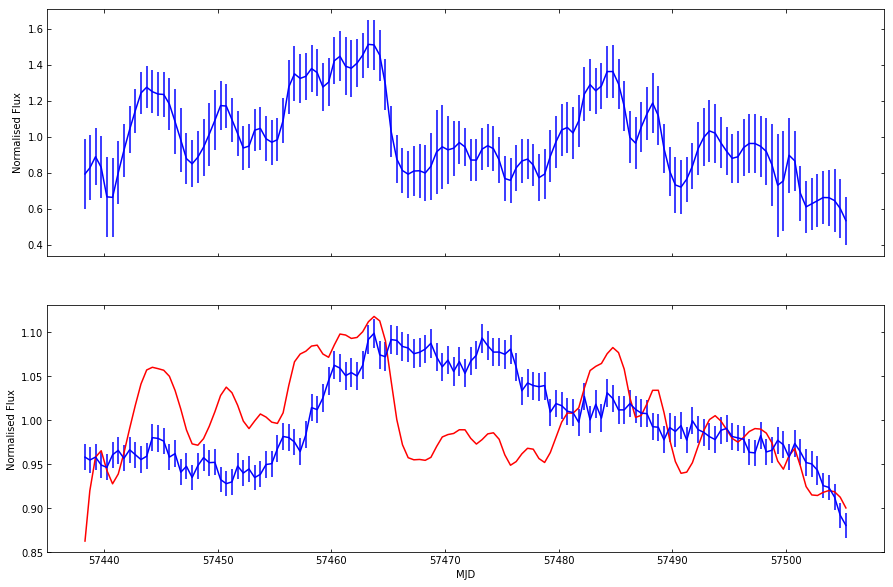

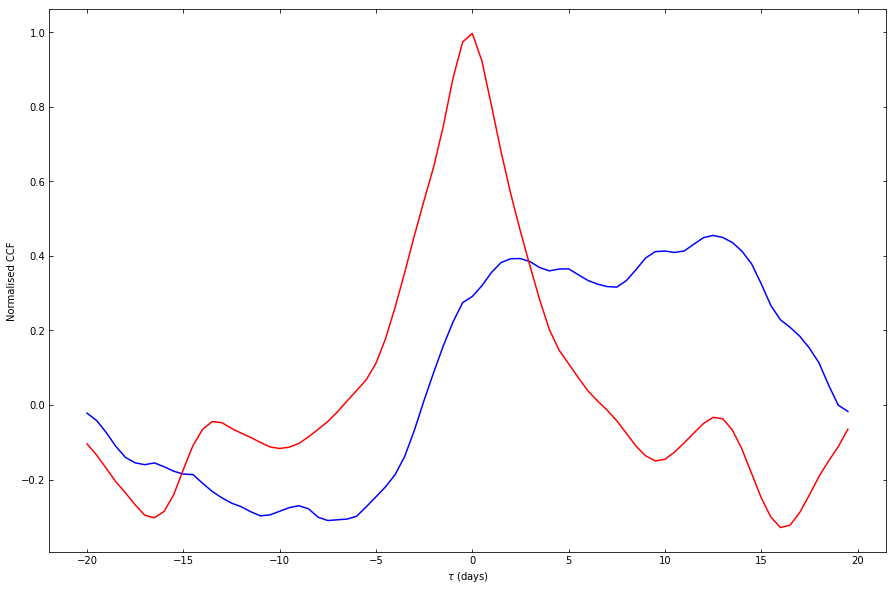

In [83]:
UV_lc = UVW1curve()

f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=  (15,10))
ax1.errorbar(comparison_times_rebn, flux_BAT_rebn/np.average(flux_BAT_rebn), flux_err_BAT_rebn/np.average(flux_BAT_rebn), label = 'BAT', c= 'blue')
ax2.plot(comparison_times_rebn, UV_lc/np.average(UV_lc), label = 'UVW1 predicted', c = 'r')
ax2.errorbar(comparison_times_rebn, flux_UVW1_rebn/np.average(flux_UVW1_rebn), flux_err_UVW1_rebn/np.average(flux_UVW1_rebn), label = 'UVW1 data', c= 'blue')
ax2.set_xlabel('MJD')
ax2.set_ylabel('Normalised Flux')
ax1.set_ylabel('Normalised Flux')
ax1.tick_params(axis = 'both', bottom='on', top='on', left='on', right='on', direction= 'in')
ax2.tick_params(axis = 'both', bottom='on', top='on', left='on', right='on', direction= 'in')

f, ax = plt.subplots(figsize=  (15,10))
CCF_dat = CCF_corrected(flux_UVW1_rebn, flux_BAT_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_BAT_rebn)
CCF_mod = CCF_corrected(UV_lc, flux_BAT_rebn, dt_rebn,  flux_err_UVW1_rebn/np.average(flux_UVW1_rebn) * np.average(UV_lc), h_err = flux_err_BAT_rebn, mode=  'nocorr')
ax.tick_params(axis = 'both', bottom='on', top='on', left='on', right='on', direction= 'in')
ax.plot(taus, CCF_dat, c = 'b')
ax.plot(taus, CCF_mod, c = 'r')
ax.set_title('')
ax.set_xlabel(r'$\tau$ (days)')
ax.set_ylabel('Normalised CCF')
plt.show()